In [3]:
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from numpy import pi

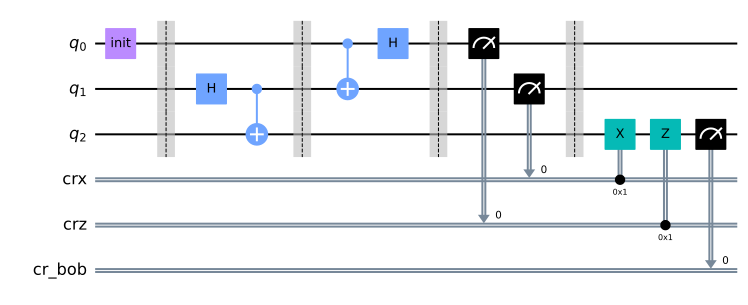

In [10]:
""" 量子テレポーテーションの量子回路
量子テレポーテーションは、量子もつれを用いて、ある量子ビットの状態を別の量子ビットに移す操作のこと。

【前提】
* AliceはBobにある量子状態|ψ>を送りたい
* AliceとBobは古典通信しかできない
* AliceとBobは以前に会っており、もつれ合った量子ビットを1つずつ持っている。

この前提状態で、Aliceは|ψ>状態をBobに送りたい。

【量子回路の量子ビットの説明】
q0: Aliceが送りたい量子ビットの状態
q1: Aliceが持つもつれ量子ビット対のかたわれ
q2: Bob　が持つもつれ量子ビット対のかたわれ
"""
q = QuantumRegister(3, name="q")
crx = ClassicalRegister(1, name="crx")
crz = ClassicalRegister(1, name="crz")
cr_bob = ClassicalRegister(1, name="cr_bob")

qc = QuantumCircuit(q, crx, crz, cr_bob)

# Aliceが送りたい量子ビットの状態を用意
init_gate = QuantumCircuit(1, name="init")
init_gate.rx(pi/3, 0)
qc.append(init_gate, [0])
qc.barrier()

# AliceとBobが共有している量子ビット対の準備
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Aliceが送りたい量子ビットと、自分のもつれ量子ビットを相互作用させる
qc.cx(0,1)
qc.h(0)
qc.barrier()

# Aliceのもつ量子ビットを測定
qc.measure(0, crz)
qc.measure(1, crx)
qc.barrier()

# Aliceから送られた測定結果より、Bobの操作を決める
def decode_bob(qc):
    qc.x(2).c_if(crx, 1)
    qc.z(2).c_if(crz, 1)

decode_bob(qc)
qc.measure(2, cr_bob)

# 描画
qc.draw()

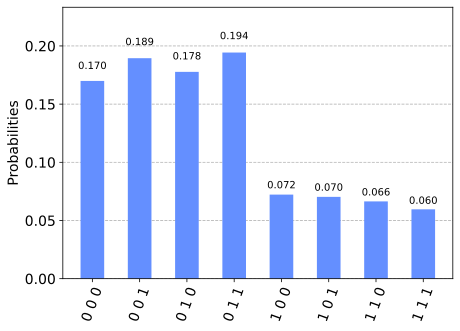

In [11]:
"""実行
"""
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

In [12]:
"""q2の測定結果のみを集計する
"""
count_zero = 0
count_one = 0

for key in counts.keys():
    if key[0] == "0":
        count_zero += counts[key]
    else:
        count_one += counts[key]

print("probability |0>: {:.3f}".format(count_zero/shots))
print("probability |1>: {:.3f}".format(count_one/shots))

probability |0>: 0.731
probability |1>: 0.269
